# VISUALIZACION DE LOS DATOS

In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

In [3]:
RADIUS = 0; TEXTURE = 1; PERIMETER = 2; AREA = 3;
# print (breast_cancer.DESCR)  #Text information about this dataset

print("-Contains 442 samples (rows) and 30 features (columns)")
print(X.shape, "\n")  # Contains 442 samples (rows) and 10 features (columns)

print("-Adequate for Regression. The target are numbers.")
print(y.shape, "\n")  # Adequate for Regression. The target are numbers.

print("-Print rows of data, starting from row 0 to row 5-1")
print(X[0:5,:], "\n") # print rows of data, starting from row 0 to row 5-1

print("-Rows of target data, starting from row 0 to row 5-1")
print(y[0:5], "\n")   # Rows of target data, starting from row 0 to row 5-1

print("-Print the feature PERIMETER from the third row")
print(X[1,PERIMETER], "\n") # print the feature PERIMETER from the third row

print("-Print the feature RADIUS for rows 1 and 2")
print(X[1:3, RADIUS], "\n") # print the feature RADIUS for rows 1 and 2

-Contains 442 samples (rows) and 30 features (columns)
(569, 30) 

-Adequate for Regression. The target are numbers.
(569,) 

-Print rows of data, starting from row 0 to row 5-1
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.57

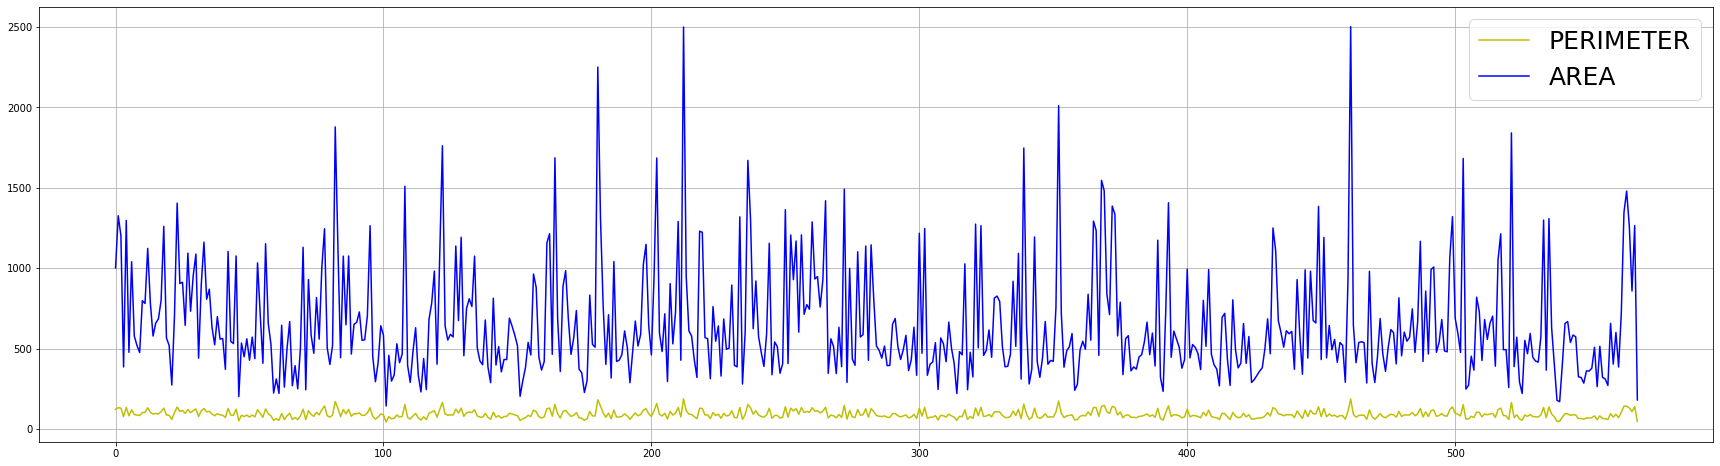

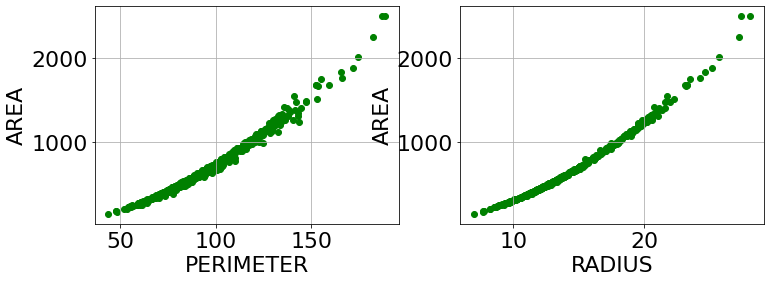

In [4]:
x = range(0, breast_cancer.data.shape[0],1)  # same as x = range(0, len(y),1)

# Plot of several features
plt.figure(figsize=(30,8))
plt.plot(x, X[:,PERIMETER], 'y-', label = 'PERIMETER')
plt.plot(x, X[:,AREA], 'b-', label = 'AREA')
plt.rcParams.update({'font.size':22});
plt.legend(prop={'size':25}); plt.grid(); plt.show()

fig, axs = plt.subplots(1,2, figsize=(12,4))

# Scatterplots of several features
for fig, feature, label in zip(range(2),[PERIMETER,RADIUS],
                                        ['PERIMETER', 'RADIUS']):
    axs[fig].scatter(X[:,feature],X[:,AREA],c='g', marker="o")
    axs[fig].set_xlabel(label); axs[fig].set_ylabel('AREA')
    axs[fig].grid(); 

plt.show()

# IMPLEMENTACION DEL MODELO

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

mn_scaler = preprocessing.MinMaxScaler()
X = mn_scaler.fit_transform(X)
mn_scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
# random_state -> se usa porque al hacer distintas ejecuciones sucesivas, cogerá los mismos datos de entrenamiento y testeo.

model = Sequential()
model.add(Dense(25, input_dim=X.shape[1], activation='relu'))   
model.add(Dense(1, activation = 'sigmoid'))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam', metrics = 'accuracy')

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=50, batch_size=4, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                775       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
114/114 [==============================] - 3s 12ms/step - loss: 0.6412 - accuracy: 0.7011 - val_loss: 0.5747 - val_accuracy: 0.8684
Epoch 2/50
114/114 [==============================] - 1s 5ms/step - loss: 0.5324 - accuracy: 0.8527 - val_loss: 0.4582 - val_accuracy: 0.9298
Epoch 3/50
114/114 [==============================] - 0s 4ms/step - loss: 0.4297 - accuracy: 0.8967 - val_loss: 0.3576 - val_accuracy: 0.9386
Epoch 4/50
114/114 [=======

#VISUALIZACION DE LOS RESULTADOS

KeyError: ignored

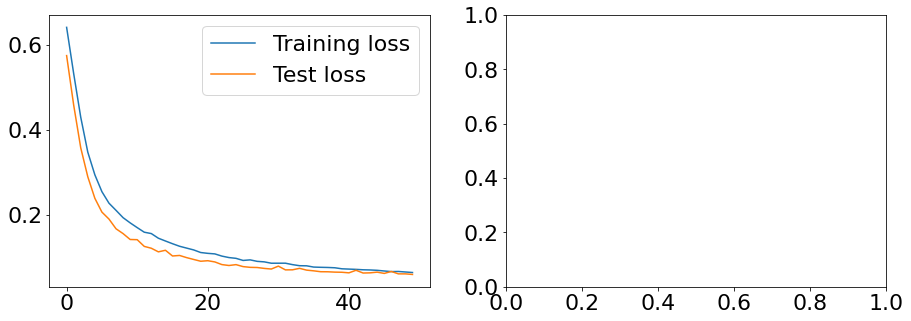

In [7]:
def plot(history):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(history.history['loss'], label='Training loss')
    ax[0].plot(history.history['val_loss'], label='Test loss')

    ax[0].legend()
    
    ax[1].plot(history.history['mae'], label='Training mae')
    ax[1].plot(history.history['val_mae'], label='Test mae')
    
    ax[1].legend()
    
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Mae')
    
    # Para visualizar mejor el loss respecto al cero
    # ax[0].set_ylim(0, 1)

plot(history)